线性回归算法实现（扩展）
在“线性回归算法实现”部分，使用的数据集为 lr2_data.txt，主要是自行模拟的房屋面积与
房屋价格数据。该数据集可在实验环境搭建中获取。

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def generate_gradient(X,theta,y):
    sample_count = X.shape[0]
    #计算梯度
    return(1/sample_count)*X.T.dot(X.dot(theta)-y)

In [24]:
#读取数据集函数
def get_training_data(file_path):
    orig_data = np.loadtxt(file_path,skiprows=1)
    cols = orig_data.shape[1]# 获取数据的列数（特征数加一，因为最后一列通常是目标变量）
    return(orig_data,orig_data[:,:cols - 1],orig_data[:,cols - 1])

In [25]:
#初始化Θ数组
def init_theta(feature_count):
    return np.ones(feature_count).reshape(feature_count,1)

In [26]:
#定义函数，实现梯度下降算法
def gradient_descending(X,y,theta,alpha):
    Jthetas = []# 记录代价函数 J(θ)的变化趋势，验证梯度下降是否运行正确
    # L2计算损失函数，等于真实值与预测值差的平方。(y^i-h(x^i))^2
    Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
    index = 0
    gradient = generate_gradient(X,theta,y)
    while not np.all(np.absolute(gradient) <= 1e-5):#梯度小于 0.00001 时计算结束
        theta = theta - alpha*gradient
        gradient = generate_gradient(X,theta,y)#计算新梯度
        Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
        if (index+1)%10 == 0:
            Jthetas.append((index,Jtheta[0]))
        index += 1
    return theta,Jthetas


In [27]:
#定义函数，可视化损失函数变化曲线
def showJTheta(diff_value):
    p_x = []
    p_y = []
    for(index,sum) in diff_value:
        p_x.append(index)
        p_y.append(sum)
    plt.plot(p_x,p_y,color='b')
    plt.xlabel('steps')
    plt.ylabel('loss funtion')
    plt.title('A-A')
    plt.show()

In [28]:
#展示实际结果和拟合图
def showlinercurve(theta,sample_training_set):
    x,y = sample_training_set[:,1],sample_training_set[:,2]
    z = theta[0]+theta[1]*x
    plt.scatter(x, y, color='b', marker='x',label="sample data")
    plt.plot(x, z, 'r', color="r",label="regression curve")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('liner regression curve')
    plt.legend()
    plt.show()

w:3.804289951653244 b:0.00013023539663936334


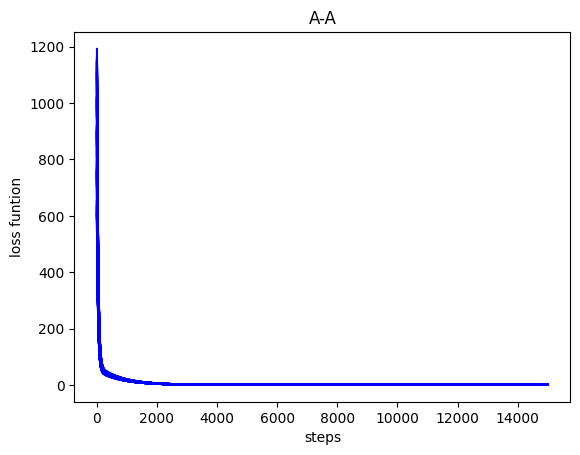

C:\Users\WMU\AppData\Local\Temp\ipykernel_22544\266323337.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, z, 'r', color="r",label="regression curve")


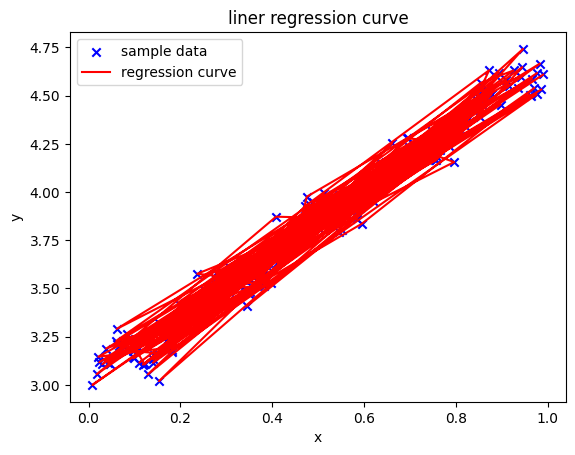

In [29]:
#最终展示
filepath = r"F:\LIULANQIdownloads\ML\02\lr2_data.txt"
training_data_include_y,training_x,y = get_training_data(filepath)
# 获取数据集数量及特征数
sample_count,feature_count = training_x.shape
alpha = 0.01
theta = init_theta(feature_count)
# 获取最终的参数 Ɵ 及代价
result_theta,Jthetas = gradient_descending(training_x,y,theta,alpha)

print("w:{}".format(result_theta[0][0]),"b:{}".format(result_theta[1][0]))
showJTheta(Jthetas)
showlinercurve(result_theta,training_data_include_y)